In [124]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
train_data = pd.read_csv(r"Data\train.csv")
test_data = pd.read_csv(r"Data\test.csv")


In [126]:
train_data['price2'] = train_data['price'] / train_data['Feature 1']
train_data['price3'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x)
train_data['price4'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x*x)
train_data['Feature 1.1'] = train_data['Feature 1'].apply(lambda x : x*x)


In [127]:
train_data['price3'].count()

135501

In [128]:
train_data.loc[train_data['price3'] > 15000 ].count()

Unnamed: 0     40
id             40
Feature 1      40
Feature 2      40
Feature 3      40
Feature 4      40
Feature 5      40
Feature 6      40
Feature 7      40
Feature 8      40
Feature 9      40
Feature 10     40
Feature 11     40
Feature 12     40
Feature 13     40
Feature 14     40
Feature 15     40
Feature 16     40
Feature 17     40
Feature 18     40
Feature 19     40
Feature 20     40
Feature 21     40
Feature 22     40
Feature 23     40
Feature  24    40
Feature 25     40
Feature 26     40
price          40
price2         40
price3         40
price4         40
Feature 1.1    40
dtype: int64

In [129]:
train_data.loc[(train_data['price3'] > 12500) | (train_data['price3'] < 1700) ].shape


(141, 33)

In [130]:
train_data2 = train_data.loc[(train_data['price3'] < 12500) & (train_data['price3'] > 1700)]

In [131]:
train_data= train_data.drop('Unnamed: 0',axis=1)


In [132]:

train_corr = train_data.corr().drop([f'Feature {x}' for x in range(2,23)]).drop('id').drop('id',axis=1)

In [133]:
train_corr = train_corr.apply(lambda x : abs(x))

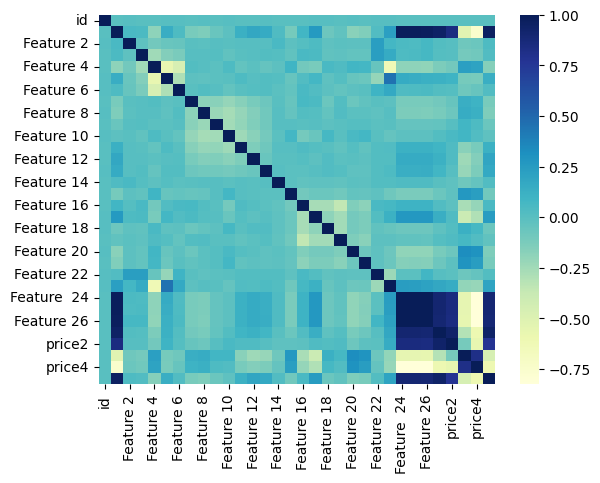

In [134]:
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu")

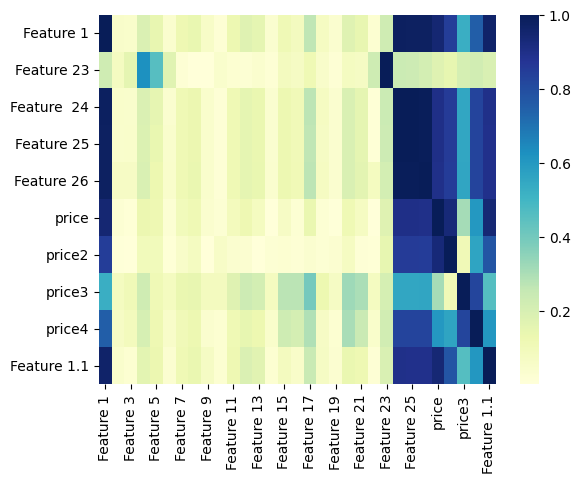

In [135]:
dataplot = sns.heatmap(train_corr, cmap="YlGnBu")


<Axes: xlabel='price2', ylabel='Count'>

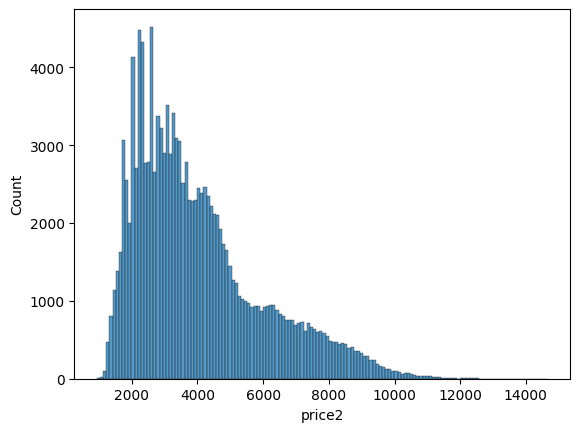

In [90]:
sns.histplot(x="price2",data=train_data2)

<Axes: xlabel='price3', ylabel='Count'>

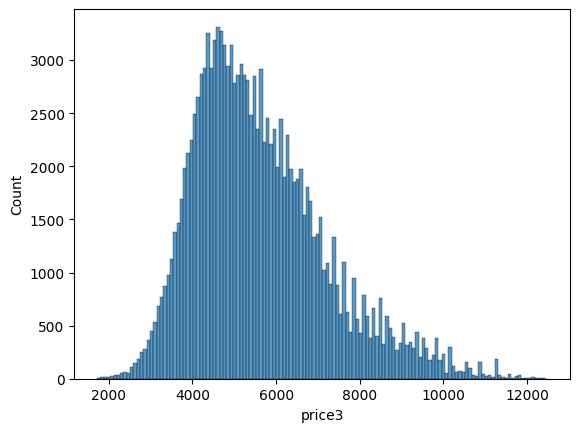

In [89]:
sns.histplot(x="price3",data=train_data2)


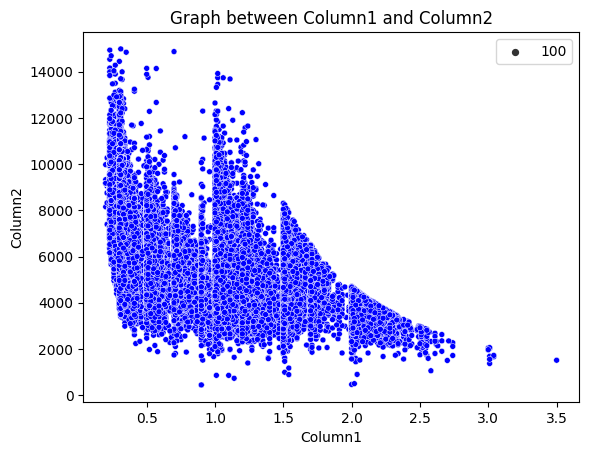

In [60]:
sns.scatterplot(x='Feature 1', y='price3', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


In [35]:
temp = train_data["Feature 1"]

In [37]:
temp = train_data['Feature 1'].apply(lambda x : x * x )

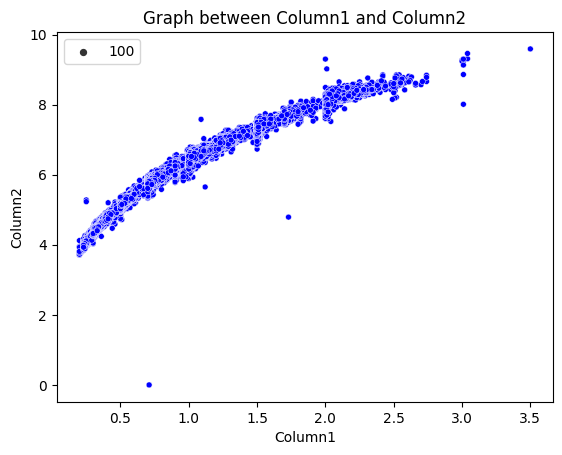

In [39]:
sns.scatterplot(x='Feature 1', y='Feature 25', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

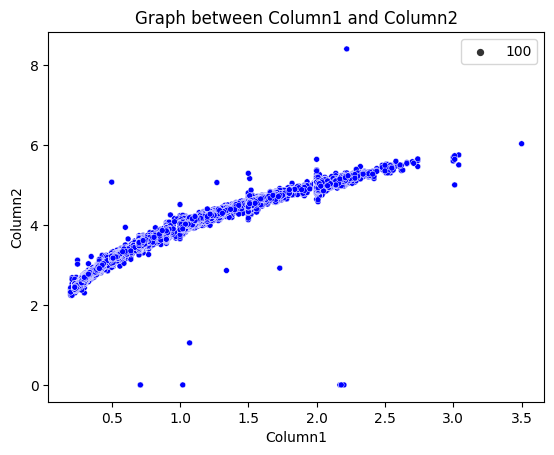

In [23]:
sns.scatterplot(x='Feature 1', y='Feature 26', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


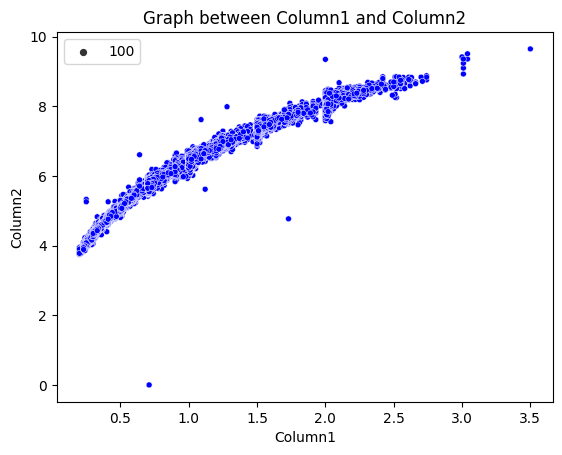

In [25]:
sns.scatterplot(x='Feature 1', y='Feature  24', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


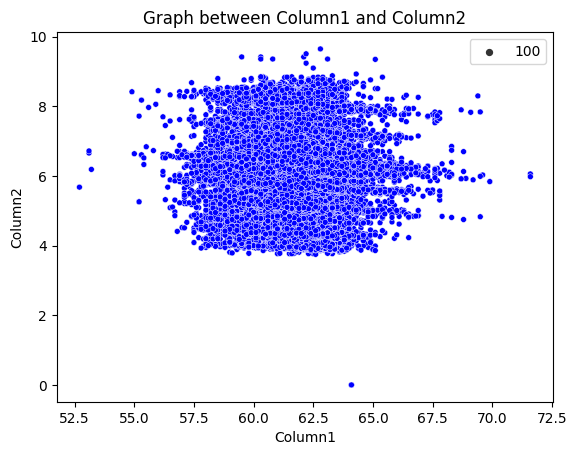

In [28]:
sns.scatterplot(x='Feature 22', y='Feature  24', data=train_data, color='blue', size=100)
plt.title('Graph between Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()


In [47]:
for col in data.columns:
    unique_values = data[col].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        print(f"{col} contains only 0 and 1")

Feature 2 contains only 0 and 1
Feature 3 contains only 0 and 1
Feature 4 contains only 0 and 1
Feature 5 contains only 0 and 1
Feature 6 contains only 0 and 1
Feature 7 contains only 0 and 1
Feature 8 contains only 0 and 1
Feature 9 contains only 0 and 1
Feature 10 contains only 0 and 1
Feature 11 contains only 0 and 1
Feature 12 contains only 0 and 1
Feature 13 contains only 0 and 1
Feature 14 contains only 0 and 1
Feature 15 contains only 0 and 1
Feature 16 contains only 0 and 1
Feature 17 contains only 0 and 1
Feature 18 contains only 0 and 1
Feature 19 contains only 0 and 1
Feature 20 contains only 0 and 1
Feature 21 contains only 0 and 1


In [49]:
target_variable = data["price"]

In [50]:
data_input = data.drop('price',axis=1)

In [51]:
data_input

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,143728,143728,0.53,0,0,1,0,0,0,1,...,0,0,1,0,0,62.0,56.0,5.16,5.20,3.21
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,0,0,63.8,56.0,4.89,5.02,3.18
2,124407,124407,2.03,0,0,1,0,0,0,0,...,1,0,0,0,0,59.2,60.0,8.39,8.29,4.94
3,45535,45535,0.33,0,0,1,0,0,0,1,...,0,0,1,0,0,61.5,55.0,4.41,4.47,2.73
4,178894,178894,0.90,0,1,0,0,0,0,0,...,0,0,1,0,0,63.6,59.0,6.04,6.08,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,34345,0.70,0,1,0,0,0,1,0,...,1,0,0,0,0,63.3,57.0,5.65,5.61,3.56
135497,9899,9899,0.33,0,0,1,0,0,0,0,...,0,0,0,0,0,62.6,57.0,4.43,4.40,2.77
135498,142454,142454,2.03,0,0,0,1,0,0,0,...,0,0,1,0,0,59.7,59.0,8.38,8.30,4.97
135499,129168,129168,0.73,0,1,0,0,0,0,1,...,0,0,1,0,0,63.2,59.0,5.67,5.72,3.61


In [52]:
X_train ,X_test,y_train,y_test = train_test_split(data_input,target_variable, test_size=0.2, random_state=42)

In [53]:

rf = RandomForestRegressor(n_estimators = 10, max_features = 'sqrt', max_depth = 5, random_state = 18)


In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [55]:
y_pred = rf.predict(X_test)


In [56]:
data_output = pd.DataFrame(y_pred,y_test)
data_output

,0
price,
1412,1490.8
2027,1881.4
2397,2192.7
4969,4554.7
5887,5830.2
...,...
625,677.6
3927,3822.1
405,467.9


In [57]:
with_feature1 = {}

with_feature1['Mean Absolute Error:'] =  metrics.mean_absolute_error(y_test, y_pred)  
with_feature1['Mean Squared Error:'] =  metrics.mean_squared_error(y_test, y_pred) 
with_feature1['Root Mean Squared Error:'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [58]:
with_feature1

{'Mean Absolute Error:': 324.39246153278475,
 'Mean Squared Error:': 410113.5632297701,
 'Root Mean Squared Error:': 640.401095587578}

In [59]:
rf.score(X_test, y_test)

0.9746743086233429

In [129]:
#filename = 'mymodel.sav'
#pickle.dump(rf, open(filename, 'wb'))